In [35]:
import sympy as sym
import numpy as np
import math
import matplotlib.pyplot as plt
from pprint import pprint

polinomio sin simplificar
-41.6666666666667*(x - 8.5)*(x - 8.3)*(x - 8.2) + 293.33333333333*(x - 8.5)*(x - 8.3)*(x - 8.0) - 243.33333333333*(x - 8.5)*(x - 8.2)*(x - 8.0) + 58.3333333333334*(x - 8.3)*(x - 8.2)*(x - 8.0)
Simplificacion
66.666666666666*x**3 - 1651.83333333332*x**2 + 13639.5833333332*x - 37531.4166666663


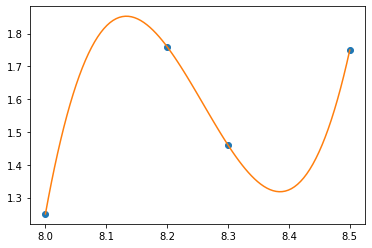

In [10]:
xi = np.array([8,8.2,8.3,8.5]) #Se insertan los valores
fi = np.array([1.25,1.76,1.46,1.75])

#Proceso
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
for i in range(0,n,1):
    numerador = 1
    denominador = 1

    for j in range(0,n,1):
        if (i!=j):
            numerador = numerador * (x-xi[j])
            denominador = denominador * (xi[i]-xi[j])
            termino = (numerador/denominador)*fi[i]

    polinomio = polinomio + termino

polisimple = sym.expand(polinomio)
px = sym.lambdify(x,polinomio)

#Vectores
muestras = 100
a = np.min(xi)
b = np.max(xi)
p_xi= np.linspace(a,b,muestras)
pfi = px(p_xi)

#Salida
print("polinomio sin simplificar")
print(polinomio)
print("Simplificacion")
print(polisimple)
#Grafica
plt.plot(xi,fi,'o')
plt.plot(p_xi, pfi)
plt.show()

In [19]:
px(8.4)

1.3233333333333341

In [20]:
xi = np.array([8,8.2,8.3,8.5]) #Se insertan los valores
fi = np.array([1.25,1.76,1.46,1.75])
c = np.polyfit(xi,fi,3)
print(c)
p = np.poly1d(c)
print(p)
print(np.polyval(p,8.4))

[    66.66666667  -1651.83333335  13639.58333347 -37531.41666704]
       3        2
66.67 x - 1652 x + 1.364e+04 x - 3.753e+04
1.3233333333046176


In [21]:
def LagrangePol(datos):
    """
    Implementación del interpolador de Lagrange 
    Entradas:
    datos -- lista de puntos (x, y) en el plano

    Salida:
    P -- función de interpolación
    """

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # pol $L_k(x)=\prod\limits_{i \neq k}\frac{x-x_i}{x_k-x_i}$
        out = 1
        for i, p in enumerate(datos):
            if i != k:
                out *= (x - p[0])/(datos[k][0] - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # polinomio $P(x)=\sum\limits_{k}f(x_k)L_k(x)$
        lag = 0
        for k, p in enumerate(datos):
            lag += p[1]*L(k, x)
        return lag

    return P

In [50]:
xi = np.array([8,8.2,8.3,8.5]) #Se insertan los valores
fi = np.array([1.25,1.76,1.46,1.75])
datos=[(8,1.25),(8.2,1.76),(8.3,1.46),(8.5,1.75)]
Pf=LagrangePol(datos)
print(Pf(8.4))

1.323333333333337


In [30]:
def NewtonPol(dat):
    """
    Implementación del interpolador de Newton
    Entradas:
    dat -- lista de puntos (x, y) en el plano

    Salidas:
    F -- tabla de diferencias divididas
    P -- función de interpolación
    """
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P


In [41]:
datos1 = [(0,1), (1,3), (2,2), (3,1), (4,3)]
F,Pn = NewtonPol(datos1)

In [42]:
pprint(F)

[[1, 0, 0, 0, 0],
 [3, 2.0, 0, 0, 0],
 [2, -1.0, -1.5, 0, 0],
 [1, -1.0, 0.0, 0.5, 0],
 [3, 2.0, 1.5, 0.5, 0.0]]


In [40]:
Pn(0)

1.0

In [45]:
F,Pn = NewtonPol(datos)
pprint(F)

[[1.25, 0, 0, 0],
 [1.76, 2.550000000000009, 0, 0],
 [1.46, -2.999999999999958, -18.499999999999847, 0],
 [1.75, 1.4500000000000053, 14.833333333333174, 66.66666666666605]]


In [48]:
Pn(8.4)

1.3233333333333372